<a href="https://colab.research.google.com/github/AryaPratamaPutra-10/Analys_Data_Lele/blob/main/Analisis%20Lele%20part%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython import get_ipython
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# atau algoritma lain seperti RandomForestRegressor, SVR, dll.
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Attention, Add, Input, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import joblib

In [22]:
import pandas as pd

# Membaca data keseluruhan

# Skenario 1
Lele_data_url = "https://github.com/AryaPratamaPutra-10/Analys_Data_Lele/raw/75a3f74df5b05158dbf856cca04b977a20d67a47/Data_Lele_1.csv"

# Baca data CSV dengan penanganan error, tanpa parsing dates atau index_col
df = pd.read_csv(Lele_data_url, sep=';')  # Diasumsikan ';' sebagai delimiter

# Print nama kolom untuk verifikasi
print(df.columns)

# Ubah 'Tahun' menjadi bilangan bulat yang mewakili tahun
df['Tahun'] = pd.to_numeric(df['Tahun'], errors='coerce').astype('Int64')

# Sekarang, tetapkan 'Tahun' sebagai indeks
df = df.set_index('Tahun')

print('Dataset : \n', df.head())
print('Dataset : \n', df.tail())
print('\n')

# Menghitung jumlah tahun dalam dataset
days_count = len(df.index)
print("Jumlah Harga Lele dalam dataset:", days_count)


Index(['Id', 'Provinsi', 'Kabupaten/Kota', 'Jenis Ikan', 'Tahun',
       'Volume Produksi', 'Nilai Produksi', 'Harga Lele'],
      dtype='object')
Dataset : 
        Id    Provinsi Kabupaten/Kota Jenis Ikan  Volume Produksi  \
Tahun                                                              
2019  NaN  JAWA BARAT        BANDUNG       LELE          5372785   
2019  NaN  JAWA BARAT  BANDUNG BARAT       LELE          1328082   
2019  NaN  JAWA BARAT         BEKASI       LELE          2019121   
2019  NaN  JAWA BARAT          BOGOR       LELE         89814340   
2019  NaN  JAWA BARAT         CIAMIS       LELE         18162827   

       Nilai Produksi  Harga Lele  
Tahun                              
2019      85964560000     16000.0  
2019      19921230000     15000.0  
2019      34325057000     17000.0  
2019    1526843780000     17000.0  
2019     236116751000     13000.0  
Dataset : 
        Id    Provinsi Kabupaten/Kota Jenis Ikan  Volume Produksi  \
Tahun                           

In [23]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
encoder_provinsi = LabelEncoder()
encoder_kabupaten = LabelEncoder()

# Melakukan fit_transform pada kolom 'Provinsi' dan 'Kabupaten/Kota'
df['Provinsi_Encoded'] = encoder_provinsi.fit_transform(df['Provinsi'])
df['Kabupaten_Encoded'] = encoder_kabupaten.fit_transform(df['Kabupaten/Kota'])

# Menghapus kolom asli jika diinginkan
# df = df.drop(['Provinsi', 'Kabupaten/Kota'], axis=1)



 Correlation Matrix 



<Axes: >

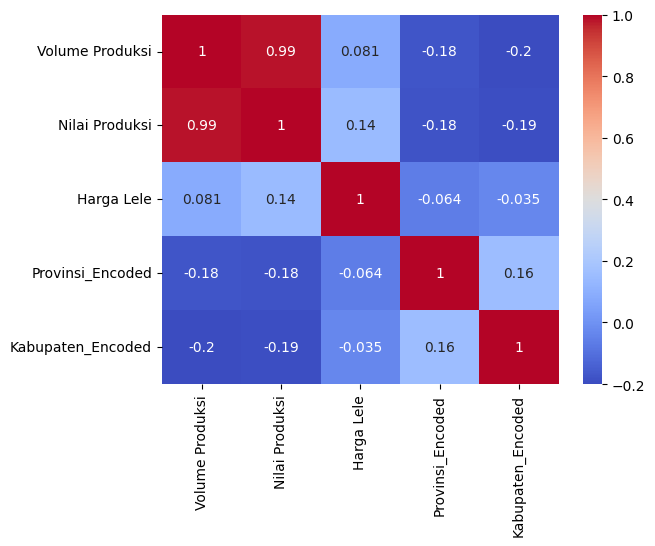

In [24]:
print("\n Correlation Matrix \n")

matrix = df.drop(columns=['Id', 'Provinsi', 'Kabupaten/Kota', 'Jenis Ikan']).corr()
# matrix = df.corr()
# Plotting correlation matrix
sns.heatmap(matrix, cmap="coolwarm", annot=True)



In [29]:
# Membagi data menjadi training, validation, dan testing sets

# Scenario 1 - 70:15:15
train = df.loc[df.index.isin(range(2019, 2020))] # Include 2019 and 2020
validation = df.loc[df.index.isin([2021, 2022])]  # Include 2021 and 2022
test = df.loc[df.index == 2023]  # Include 2023

# Displaying the number of records in each set
print(f'Training set: {train.shape[0]} records')
print(f'Validation set: {validation.shape[0]} records')
print(f'Test set: {test.shape[0]} records')

# Selecting features and target
features = ['Volume Produksi', 'Nilai Produksi', "Provinsi", "Kabupaten/Kota"] # Faktor yang mempengaruhi harga lele
X_train = train[features]
y_train = train['Harga Lele']
X_val = validation[features]
y_val = validation['Harga Lele']
X_test = test[features]
y_test = test['Harga Lele']



Training set: 0 records
Validation set: 0 records
Test set: 0 records


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# URL dataset
url = 'https://github.com/AryaPratamaPutra-10/Analys_Data_Lele/raw/75a3f74df5b05158dbf856cca04b977a20d67a47/Data_Lele_1.csv'

# Membaca dataset
df = pd.read_csv(url, sep=';')
# Memastikan tipe data yang benar
df['Tahun'] = df['Tahun'].astype(str)

# One-Hot Encoding untuk kolom 'Kabupaten/Kota' dan 'Provinsi'
df_encoded = pd.get_dummies(df, columns=['Kabupaten/Kota', 'Provinsi'])

# Fitur yang akan digunakan
features = ['Volume Produksi', 'Nilai Produksi', 'Harga Lele'] + [col for col in df_encoded.columns if 'Kabupaten/Kota' in col or 'Provinsi' in col]

# Menyiapkan data input dan target
X = df_encoded[features].values
y = df_encoded['Harga Lele'].values  # Target: Harga Lele

# Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Mengubah data menjadi bentuk yang sesuai untuk LSTM (samples, time_steps, features)
X_train_3d = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_3d = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Membuat model LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_3d.shape[1], X_train_3d.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
history = model.fit(X_train_3d, y_train, epochs=50, batch_size=32, validation_data=(X_test_3d, y_test))

# Evaluasi model
loss = model.evaluate(X_test_3d, y_test)
print(f'Loss pada data uji: {loss}')

# Prediksi harga lele ke depan
predictions = model.predict(X_test_3d)

# Evaluasi hasil prediksi dengan metrik yang lebih lengkap
r2_lstm = r2_score(y_test, predictions)
mse_lstm = mean_squared_error(y_test, predictions)
mae_lstm = mean_absolute_error(y_test, predictions)
rmse_lstm = np.sqrt(mse_lstm)

# Menampilkan hasil evaluasi
print(f'R-squared LSTM: {r2_lstm}')
print(f'MSE LSTM: {mse_lstm}')
print(f'MAE LSTM: {mae_lstm}')
print(f'RMSE LSTM: {rmse_lstm}')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0696 - val_loss: 0.0458
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0435 - val_loss: 0.0264
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0227 - val_loss: 0.0157
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - val_loss: 0.0125
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - val_loss: 0.0114
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0083 - val_loss: 0.0102
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - val_loss: 0.0094
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - val_loss: 0.0088
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - val_loss: 0.0083
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - val_loss: 0.0079
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - val_loss: 0.0076
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039 - val_loss: 0.007

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
R-squared LSTM: 0.9193268253466598
MSE LSTM: 0.0015376854876565592
MAE LSTM: 0.028069456082632463
RMSE LSTM: 0.039213333034269854


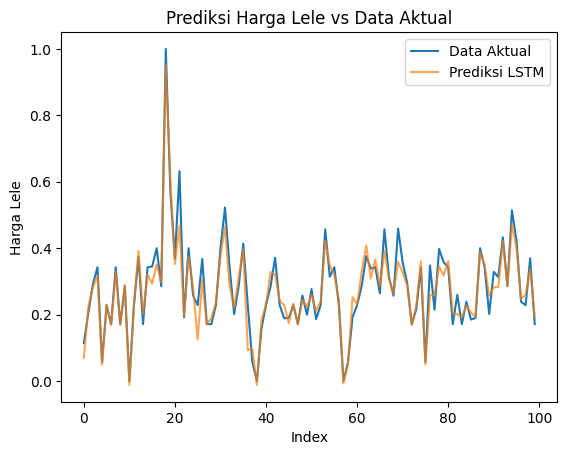

In [31]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='Data Aktual')
plt.plot(predictions, label='Prediksi LSTM', alpha=0.7)
plt.title('Prediksi Harga Lele vs Data Aktual')
plt.xlabel('Index')
plt.ylabel('Harga Lele')
plt.legend()
plt.show()


In [32]:
import numpy as np
import pandas as pd

# Fungsi untuk melakukan prediksi berurutan (recursive prediction)
def predict_future(model, last_known_data, n_years, scaler, input_shape):
    predictions = []
    current_input = last_known_data

    # Lakukan prediksi untuk n_years ke depan
    for _ in range(n_years * 12):  # Prediksi bulanan selama 4 tahun (4 tahun * 12 bulan)
        # Prediksi harga lele untuk bulan berikutnya
        pred = model.predict(current_input.reshape(1, 1, current_input.shape[1]))  # Sesuaikan bentuk input
        predictions.append(pred[0][0])  # Ambil prediksi pertama

        # Update input untuk bulan berikutnya
        current_input = np.roll(current_input, -1, axis=1)  # Geser data input untuk prediksi berikutnya
        current_input[0, -1] = pred  # Masukkan prediksi sebagai input baru

    # Kembalikan hasil prediksi yang ter-reshape
    return np.array(predictions)

# Ambil data terakhir untuk prediksi (data uji atau data terakhir dari dataset)
last_known_data = X_test_3d[-1]  # Gunakan data terakhir dari X_test

# Tentukan jumlah tahun yang ingin diprediksi (misalnya 4 tahun)
n_years = 4

# Lakukan prediksi untuk 4 tahun ke depan
future_predictions = predict_future(model, last_known_data, n_years, scaler, X_train_3d.shape)

# Skala kembali prediksi ke harga lele asli
future_predictions_rescaled = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Tampilkan hasil prediksi untuk 4 tahun ke depan
print("Prediksi harga lele 4 tahun ke depan:")
print(future_predictions_rescaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<ipython-input-32-251f73c29dfe>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[0, -1] = pred  # Masukkan prediksi sebagai input baru


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

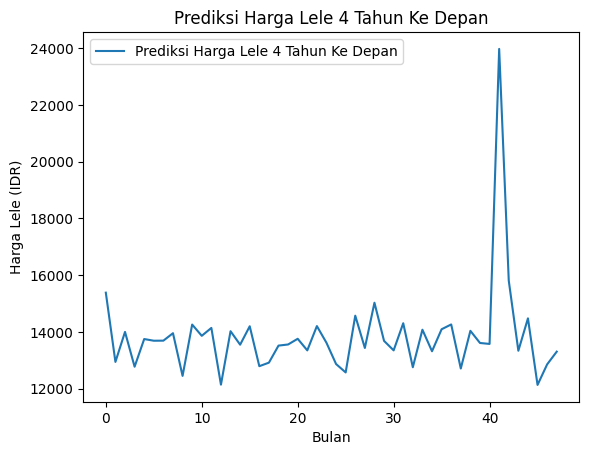

In [33]:
import matplotlib.pyplot as plt

# Membuat grafik prediksi harga lele untuk 4 tahun ke depan
plt.plot(future_predictions_rescaled, label='Prediksi Harga Lele 4 Tahun Ke Depan')
plt.title('Prediksi Harga Lele 4 Tahun Ke Depan')
plt.xlabel('Bulan')
plt.ylabel('Harga Lele (IDR)')
plt.legend()
plt.show()


In [34]:
# Mengembalikan prediksi ke skala asli
predicted_prices = scaler.inverse_transform(predictions)
print(predicted_prices)


[[13232.407 ]
 [15915.811 ]
 [16941.684 ]
 [17550.826 ]
 [12871.096 ]
 [16016.056 ]
 [14951.026 ]
 [17763.223 ]
 [14954.983 ]
 [17061.023 ]
 [11797.838 ]
 [15992.605 ]
 [18864.074 ]
 [15539.95  ]
 [17612.402 ]
 [17125.486 ]
 [18154.012 ]
 [17220.785 ]
 [28637.96  ]
 [22618.729 ]
 [18166.262 ]
 [20189.99  ]
 [15418.486 ]
 [18559.783 ]
 [16902.883 ]
 [14190.1455]
 [17332.871 ]
 [14997.828 ]
 [15334.022 ]
 [16135.896 ]
 [18574.91  ]
 [20122.488 ]
 [17005.686 ]
 [15853.716 ]
 [17426.117 ]
 [18940.213 ]
 [13621.878 ]
 [13700.359 ]
 [11797.869 ]
 [15197.084 ]
 [16051.651 ]
 [17745.729 ]
 [17627.018 ]
 [16238.667 ]
 [15998.926 ]
 [15054.622 ]
 [16086.477 ]
 [14997.484 ]
 [16281.845 ]
 [15920.383 ]
 [16538.768 ]
 [15705.201 ]
 [16188.052 ]
 [19389.785 ]
 [18108.572 ]
 [17562.123 ]
 [16274.059 ]
 [11879.2   ]
 [12872.277 ]
 [16423.096 ]
 [16042.799 ]
 [17763.469 ]
 [19143.252 ]
 [17398.363 ]
 [18416.941 ]
 [17001.285 ]
 [18845.754 ]
 [17381.34  ]
 [16613.902 ]
 [18291.428 ]
 [17714.469 ]
 [1702